<a href="https://colab.research.google.com/github/diegoatttt/portafolios.estesi/blob/etapa-2/etapa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. INSTALACIÓN DE LIBRERÍAS (Si no existen)
import sys
import subprocess
try:
    import wbgapi as wb
except ImportError:
    print("Instalando wbgapi...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wbgapi"])
    import wbgapi as wb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuración de visualización
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# =============================================================================
# 2. DEFINICIÓN DE INDICADORES
# =============================================================================
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}

Instalando wbgapi...


In [3]:
# Obtener lista de países (filtrando regiones agregadas como 'Mundo', 'Africa', etc.)
paises = wb.economy.info()
lista_iso = [p['id'] for p in paises.items if not p['aggregate']]

# Función robusta para descargar en bloques y evitar desconexiones
def descargar_datos(indicadores, year=2023):
    keys = list(indicadores.keys())
    chunk_size = 10  # Descargar de 10 en 10
    dfs = []

    for i in range(0, len(keys), chunk_size):
        chunk = keys[i:i+chunk_size]
        try:
            # Descargar bloque
            data = wb.data.DataFrame(chunk, time=year, labels=True).reset_index()
            # Filtrar solo países reales
            data = data[data['economy'].isin(lista_iso)]
            dfs.append(data)
        except Exception as e:
            print(f"Advertencia: No se pudo descargar bloque {chunk}. Error: {e}")

    if not dfs:
        return pd.DataFrame()

    # Unir todos los bloques
    df_final = dfs[0]
    for df in dfs[1:]:
        # Unir por código de economía (economy)
        cols_usar = df.columns.difference(df_final.columns).tolist()
        cols_usar.append('economy')
        df_final = pd.merge(df_final, df[cols_usar], on='economy', how='outer')

    return df_final

df_raw = descargar_datos(indicadores_wb)
df_raw.rename(columns={'economy': 'country'}, inplace=True)
print(f"Descarga completada. Dimensiones iniciales: {df_raw.shape}")


Descarga completada. Dimensiones iniciales: (217, 67)


Variables eliminadas (>15% nulos): 36
Datos limpios. Dimensiones actuales: (198, 31)


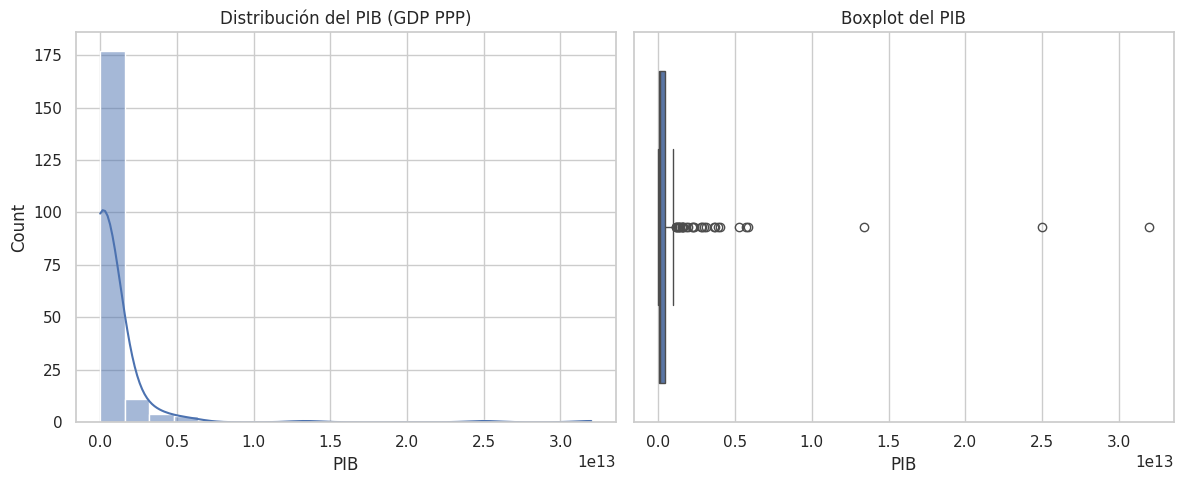


Conteo de países por categoría de PIB:
NY.GDP.MKTP.PP.KD
Low            40
Medium         40
High           40
Medium-Low     39
Medium-High    39
Name: count, dtype: int64


In [5]:
# Regla: Si falta > 15%, se elimina la variable. Si falta < 15%, se imputa.
percent_nulos = df_raw.isnull().mean() * 100
umbral = 15.0

vars_a_eliminar = percent_nulos[percent_nulos > umbral].index.tolist()

# IMPORTANTE: Protegemos la variable objetivo 'NY.GDP.MKTP.PP.KD' y 'country'
target = "NY.GDP.MKTP.PP.KD"
if target in vars_a_eliminar: vars_a_eliminar.remove(target)
if 'country' in vars_a_eliminar: vars_a_eliminar.remove('country')
if 'Country' in vars_a_eliminar: vars_a_eliminar.remove('Country')

print(f"Variables eliminadas (>15% nulos): {len(vars_a_eliminar)}")
df_clean = df_raw.drop(columns=vars_a_eliminar)

# 4.2 Limpieza de filas (Países sin PIB)
# No podemos predecir si no tenemos el dato objetivo, así que borramos esas filas
df_clean = df_clean.dropna(subset=[target])

# 4.3 Imputación de valores faltantes (usando la Mediana)
cols_numericas = df_clean.select_dtypes(include=[np.number]).columns
for col in cols_numericas:
    if df_clean[col].isnull().sum() > 0:
        mediana = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(mediana)

print(f"Datos limpios. Dimensiones actuales: {df_clean.shape}")



# 4.5 Visualización del PIB (Variable Objetivo)
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_clean[target], kde=True, bins=20)
plt.title('Distribución del PIB (GDP PPP)')
plt.xlabel('PIB')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean[target])
plt.title('Boxplot del PIB')
plt.xlabel('PIB')

plt.tight_layout()
plt.show()

# 4.6 Discretización de la variable objetivo
# Crear 5 categorías: Low, Medium-Low, Medium, Medium-High, High
df_clean[target] = pd.qcut(df_clean[target], q=5,
                           labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

print("\nConteo de países por categoría de PIB:")
print(df_clean[target].value_counts())


Variables de entrada para PCA: 28


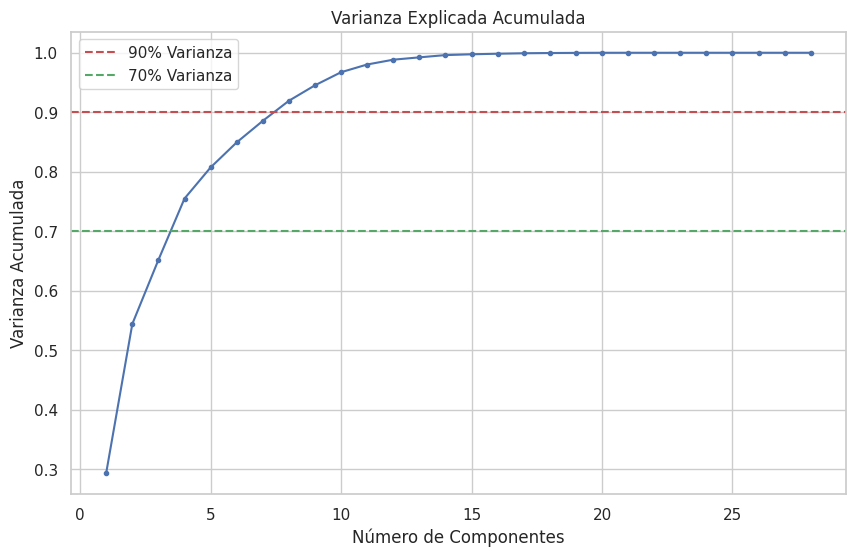

Número de componentes seleccionados (Explica >85%): 7
Varianza exacta: 0.8855

--- DataFrame Final (Primeras filas) ---


,country,Country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,NY.GDP.MKTP.PP.KD
0,ABW,Aruba,0.005811,1.556354,-0.573843,-1.406875,-0.505733,0.728019,-0.129189,Low
1,AFG,Afghanistan,-1.752635,-3.036745,0.066936,-0.047784,0.503914,0.874429,0.592355,Medium
2,AGO,Angola,-1.393439,-2.251194,0.175176,0.596868,-0.345573,-0.703868,-1.275710,Medium-High
3,ALB,Albania,0.292434,2.043065,-0.640355,-1.735211,0.821579,-0.171682,0.925948,Medium-Low
4,AND,Andorra,0.792092,3.318045,0.022572,1.383240,-0.533968,0.355067,-0.156993,Low


In [6]:
# Seleccionamos solo columnas numéricas para el PCA
X = df_clean.select_dtypes(include=[np.number])

# Aseguramos que 'X' no tenga columnas irrelevantes
# (El target ya es categórico gracias al paso anterior, así que select_dtypes lo excluye automáticamente)
print(f"Variables de entrada para PCA: {X.shape[1]}")

# 5.2 Estandarización (Obligatorio para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5.3 Aplicación de PCA
pca = PCA()
pca.fit(X_scaled)

# 5.4 Análisis de Varianza Explicada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='.', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Varianza')
plt.axhline(y=0.70, color='g', linestyle='--', label='70% Varianza')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid(True)
plt.show()

# 5.5 Selección de componentes (Criterio: > 85% varianza)
# Buscamos el índice donde la varianza acumulada supera 0.85
n_componentes = np.argmax(varianza_acumulada >= 0.85) + 1
print(f"Número de componentes seleccionados (Explica >85%): {n_componentes}")
print(f"Varianza exacta: {varianza_acumulada[n_componentes-1]:.4f}")

# 5.6 Transformación y Creación del DataFrame Final
pca_final = PCA(n_components=n_componentes)
X_pca = pca_final.fit_transform(X_scaled)

# Crear DataFrame con las componentes
cols_pca = [f'PC{i+1}' for i in range(n_componentes)]
df_pca = pd.DataFrame(X_pca, columns=cols_pca)

# Unir con identificadores y el target categorizado
df_final = pd.concat([
    df_clean[['country', 'Country']].reset_index(drop=True),
    df_pca,
    df_clean[target].reset_index(drop=True)
], axis=1)

print("\n--- DataFrame Final (Primeras filas) ---")
display(df_final.head())